## Executive Summary

Original goal was to use neural networks to build a better model to asses credit risk. I started with a standard relu, sigmoid layered nerual network. However, I wanted to increase my socre so I implemented a another neural network with more layers, and it did a little bit better. Still I wanted to increase my score so I implemented a recurrent neural netowrk, this was not as succcessful as I would have originally had hoped. So I set out to discover why. On a google cloud server designed for deep learning I created a gridsearch to try hundreds of different kinds of neural networks. I wanted to see how much, or if this would produce really any different results. It was extremely computationaly inefficient and took me over 100 hours. After all of this I only was able to run 30 different neural network models, and found one that was able to predict my best score, but not by a lot. In fact it was barely any different than my super basic neural netowork. I wanted to figure out why this was. Could have it been my data, or was it how I build my models. 

My gridsearch produced very similar results and converged around .72% which is not fantastic or much better than my score on the very basic neural network. I will run through many different neural netowrks to test for their efficacy. When I did not produce the results I wanted I tried testing them on different data sets to see if the results got better moving from a very basic neural network to a recurrent neural network. In general, the recurrent neural network did not do very well. Simple neural network with relu and softmax perceptrons operated the fastest and with generally a high degree of accuracy. I would not recomend building recurrent neural networks for binary classification, as they are far more complicated and do not do much better, if at all. 

#### Import required packages for project

In [237]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import eda
import eda_df


plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
% load_ext giphy_magic

The giphy_magic extension is already loaded. To reload it, use:
  %reload_ext giphy_magic


In [238]:
# File path to website with dataset needed
html_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'

In [239]:
# Use request to get access to links

response = requests.get(html_path)

In [4]:
print(response.status_code)

200


In [5]:
# convert to more readable text
html = response.text

In [6]:
html = str(html)

In [7]:
type(html)

str

In [8]:
# split on every line
text = html.splitlines()

In [9]:
text[0:5]

['A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1',
 'A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2',
 'A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1',
 'A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1',
 'A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2']

In [10]:
# Split data into rows when there is a space

data = []
for line in text:
    col = line.split(' ')
    data.append(col)
    

In [11]:
# All data points are broken up into a list of list
data[0]

['A11',
 '6',
 'A34',
 'A43',
 '1169',
 'A65',
 'A75',
 '4',
 'A93',
 'A101',
 '4',
 'A121',
 '67',
 'A143',
 'A152',
 '2',
 'A173',
 '1',
 'A192',
 'A201',
 '1']

In [12]:
# Move data into a pandas dataframe

df = pd.DataFrame(data)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [14]:
# Import the codebook brom UCI's website to interpret variables.

df.shape

(1000, 21)

Attribute 1: (qualitative) 
Status of existing checking account = {
A11 : ... < 0 DM 
A12 : 0 <= ... < 200 DM 
A13 : ... >= 200 DM / salary assignments for at least 1 year 
A14 : no checking account}

Attribute 2: (numerical) 
Duration in month 

Attribute 3: (qualitative) 
Credit history 
A30 : no credits taken/ all credits paid back duly 
A31 : all credits at this bank paid back duly 
A32 : existing credits paid back duly till now 
A33 : delay in paying off in the past 
A34 : critical account/ other credits existing (not at this bank) 

Attribute 4: (qualitative) 
Purpose 
A40 : car (new) 
A41 : car (used) 
A42 : furniture/equipment 
A43 : radio/television 
A44 : domestic appliances 
A45 : repairs 
A46 : education 
A47 : (vacation - does not exist?) 
A48 : retraining 
A49 : business 
A410 : others 

Attribute 5: (numerical) 
Credit amount 

Attibute 6: (qualitative) 
Savings account/bonds 
A61 : ... < 100 DM 
A62 : 100 <= ... < 500 DM 
A63 : 500 <= ... < 1000 DM 
A64 : .. >= 1000 DM 
A65 : unknown/ no savings account 

Attribute 7: (qualitative) 
Present employment since 
A71 : unemployed 
A72 : ... < 1 year 
A73 : 1 <= ... < 4 years 
A74 : 4 <= ... < 7 years 
A75 : .. >= 7 years 

Attribute 8: (numerical) 
Installment rate in percentage of disposable income 

Attribute 9: (qualitative) 
Personal status and sex 
A91 : male : divorced/separated 
A92 : female : divorced/separated/married 
A93 : male : single 
A94 : male : married/widowed 
A95 : female : single 

Attribute 10: (qualitative) 
Other debtors / guarantors 
A101 : none 
A102 : co-applicant 
A103 : guarantor 

Attribute 11: (numerical) 
Present residence since 

Attribute 12: (qualitative) 
Property 
A121 : real estate 
A122 : if not A121 : building society savings agreement/ life insurance 
A123 : if not A121/A122 : car or other, not in attribute 6 
A124 : unknown / no property 

Attribute 13: (numerical) 
Age in years 

Attribute 14: (qualitative) 
Other installment plans 
A141 : bank 
A142 : stores 
A143 : none 

Attribute 15: (qualitative) 
Housing 
A151 : rent 
A152 : own 
A153 : for free 

Attribute 16: (numerical) 
Number of existing credits at this bank 

Attribute 17: (qualitative) 
Job 
A171 : unemployed/ unskilled - non-resident 
A172 : unskilled - resident 
A173 : skilled employee / official 
A174 : management/ self-employed/ 
highly qualified employee/ officer 

Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 

Attribute 19: (qualitative) 
Telephone 
A191 : none 
A192 : yes, registered under the customers name 

Attribute 20: (qualitative) 
foreign worker 
A201 : yes 
A202 : no 



In [15]:
# Decode the credit risk data attributes by building a dictionary for each coded attribute


# Attribute 1: (qualitative) 
checking = {
'A11' : '... < 0 DM', 
'A12' : '0 <= ... < 200 DM',
'A13' : '... >= 200 DM / salary assignments for at least 1 year', 
'A14' : 'no checking account'}


# Attribute 3: (qualitative) 
credit_history = {
'A30' : 'no credits taken/ all credits paid back duly',
'A31' : 'all credits at this bank paid back duly',
'A32' : 'existing credits paid back duly till now', 
'A33' : 'delay in paying off in the past',
'A34' : 'critical account/ other credits existing (not at this bank)}jl'}

# Attribute 4: (qualitative) 
purpose = {
'A40' : 'car (new)', 
'A41' : 'car (used)',
'A42' : 'furniture/equipment', 
'A43' : 'radio/television', 
'A44' : 'domestic appliances', 
'A45' : 'repairs', 
'A46' : 'education', 
'A47' : '(vacation - does not exist?)', 
'A48' : 'retraining',
'A49' : 'business', 
'A410' : 'others'}


# Attibute 6: (qualitative) 
savings = {
'A61' : '... < 100 DM',
'A62' : '100 <= ... < 500 DM',
'A63' : '500 <= ... < 1000 DM', 
'A64' : '.. >= 1000 DM',
'A65' : 'unknown/ no savings account'}

# Attribute 7: (qualitative) 
employment_length = {
'A71' : 'unemployed', 
'A72' : '... < 1 year',
'A73' : '1 <= ... < 4 years', 
'A74' : '4 <= ... < 7 years',
'A75' : '.. >= 7 years'}


# Attribute 9: (qualitative) 
sex_marital_status = {
'A91' :' male : divorced/separated ',
'A92' : 'female : divorced/separated/married', 
'A93' : 'male : single', 
'A94' : 'male : married/widowed', 
'A95' : 'female : single'}

# Attribute 10: (qualitative) 
debtors= {
'A101' : 'none',
'A102' : 'co-applicant', 
'A103' : 'guarantor'}


# Attribute 12: (qualitative) 
propertie = {
'A121' : 'real estate', 
'A122' : 'if not A121 : building society savings agreement/ life insurance', 
'A123' : 'if not A121/A122 : car or other, not in attribute 6',
'A124' : 'unknown / no property'}


#Attribute 14: (qualitative) 
installment_plan = {
'A141' : 'bank', 
'A142' : 'stores',
'A143' : 'none'}

# Attribute 15: (qualitative) 
housing = {
'A151' : 'rent', 
'A152' : 'own', 
'A153' : 'for free'} 


# Attribute 17: (qualitative) 
job = { 
'A171' : 'unemployed/ unskilled - non-resident', 
'A172' : 'unskilled - resident', 
'A173' : 'skilled employee / official', 
'A174' : 'management/ self-employed/'}


# Attribute 19: (qualitative) 
telephone = { 
'A191' : 'none', 
'A192' : 'yes, registered under the customers name'} 

# Attribute 20: (qualitative) 
foreign_worker = {
'A201' : 'yes',
'A202' : 'no'} 


In [16]:
# Add column names to dataframe

columns = ['checking', 'month', 'credit_history', 'purpose', 'credit_amount', 'savings',
           'employment_length', 'installment_rate', 'sex_marital_status', 'debtors',
           'resident_length', 'property', 'age', 'installment_plan', 'housing', 'num_of_credit',
           'job','liables', 'telephone', 'foreign_worker', 'target']

In [17]:
df.columns = columns

In [18]:
df.head()

,checking,month,credit_history,purpose,credit_amount,savings,employment_length,installment_rate,sex_marital_status,debtors,...,property,age,installment_plan,housing,num_of_credit,job,liables,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [19]:
# Label encoder and decoder functions to factorize data

def label_encoder(col, code_dict):
    col_coded = pd.Series(col, copy=True)
    for key, value in code_dict.items():
        col_coded.replace(key, value, inplace=True)
    return col_coded

def label_decoder(col, code_dict):
    inv_code_dict = {value: key for key, value in code_dict.iteritems()}
    col_coded = pd.Series(col, copy=True)
    for key, value in inv_code_dict.items():
        col_coded.replace(key, value, inplace=True)
    return col_coded

In [20]:
## Factorize All Classification Variables
checking

{'A11': '... < 0 DM',
 'A12': '0 <= ... < 200 DM',
 'A13': '... >= 200 DM / salary assignments for at least 1 year',
 'A14': 'no checking account'}

### Build factorize dictionary for each key value pair

In [21]:
# Build factorize dictionary for each key value pair

checking_f = {
 'A11': 0,
 'A12': 1,
 'A13': 2,
 'A14': 3}

In [22]:
print 'Previous Labels:'
print pd.value_counts(df.checking)
df.checking = label_encoder(df.checking, checking_f)
print '\n After Label Coder:'
print pd.value_counts(df.checking)

Previous Labels:
A14    394
A11    274
A12    269
A13     63
Name: checking, dtype: int64

 After Label Coder:
3    394
0    274
1    269
2     63
Name: checking, dtype: int64


In [23]:
# Repeat this process over for every variable
credit_history

{'A30': 'no credits taken/ all credits paid back duly',
 'A31': 'all credits at this bank paid back duly',
 'A32': 'existing credits paid back duly till now',
 'A33': 'delay in paying off in the past',
 'A34': 'critical account/ other credits existing (not at this bank)}jl'}

In [24]:
credit_history_f = {
 'A30': 0,
 'A31': 1,
 'A32': 2,
 'A33': 3,
 'A34': 4}

In [25]:
print 'Previous Labels:'
print pd.value_counts(df.credit_history)
df.credit_history = label_encoder(df.credit_history, credit_history_f)
print '\n After Label Coder:'
print pd.value_counts(df.credit_history)

Previous Labels:
A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64

 After Label Coder:
2    530
4    293
3     88
1     49
0     40
Name: credit_history, dtype: int64


In [26]:
purpose

{'A40': 'car (new)',
 'A41': 'car (used)',
 'A410': 'others',
 'A42': 'furniture/equipment',
 'A43': 'radio/television',
 'A44': 'domestic appliances',
 'A45': 'repairs',
 'A46': 'education',
 'A47': '(vacation - does not exist?)',
 'A48': 'retraining',
 'A49': 'business'}

In [27]:
purpose_f = {}
for n, key in enumerate(purpose):
    purpose_f[key] = n

In [28]:
purpose_f

{'A40': 7,
 'A41': 8,
 'A410': 0,
 'A42': 5,
 'A43': 6,
 'A44': 3,
 'A45': 4,
 'A46': 1,
 'A47': 2,
 'A48': 9,
 'A49': 10}

In [29]:
print 'Previous Labels:'
print pd.value_counts(df.purpose)
df.purpose = label_encoder(df.purpose, purpose_f)
print '\n After Label Coder:'
print pd.value_counts(df.purpose)

Previous Labels:
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64

 After Label Coder:
6     280
7     234
5     181
8     103
10     97
1      50
4      22
3      12
0      12
9       9
Name: purpose, dtype: int64


In [30]:
savings_f = {}
for n, key in enumerate(savings):
    savings_f[key] = n

In [31]:
savings_f

{'A61': 2, 'A62': 3, 'A63': 4, 'A64': 0, 'A65': 1}

In [32]:
print 'Previous Labels:'
print pd.value_counts(df.savings)
df.savings = label_encoder(df.savings, savings_f)
print '\n After Label Coder:'
print pd.value_counts(df.savings)

Previous Labels:
A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings, dtype: int64

 After Label Coder:
2    603
1    183
3    103
4     63
0     48
Name: savings, dtype: int64


In [33]:
employment_length_f = {}
for n, key in enumerate(employment_length):
    employment_length_f[key] = n

In [34]:
employment_length_f

{'A71': 4, 'A72': 3, 'A73': 2, 'A74': 1, 'A75': 0}

In [35]:
print 'Previous Labels:'
print pd.value_counts(df.employment_length)
df.employment_length = label_encoder(df.employment_length, employment_length_f)
print '\n After Label Coder:'
print pd.value_counts(df.employment_length)

Previous Labels:
A73    339
A75    253
A74    174
A72    172
A71     62
Name: employment_length, dtype: int64

 After Label Coder:
2    339
0    253
1    174
3    172
4     62
Name: employment_length, dtype: int64


In [36]:
sex_marital_status_f = {}
for n, key in enumerate(sex_marital_status):
    sex_marital_status_f[key] = n

In [37]:
sex_marital_status_f

{'A91': 2, 'A92': 4, 'A93': 3, 'A94': 1, 'A95': 0}

In [38]:
print 'Previous Labels:'
print pd.value_counts(df.sex_marital_status)
df.sex_marital_status = label_encoder(df.sex_marital_status, sex_marital_status_f)
print '\n After Label Coder:'
print pd.value_counts(df.sex_marital_status)

Previous Labels:
A93    548
A92    310
A94     92
A91     50
Name: sex_marital_status, dtype: int64

 After Label Coder:
3    548
4    310
1     92
2     50
Name: sex_marital_status, dtype: int64


In [39]:
debtors_f = {}
for n, key in enumerate(debtors):
    debtors_f[key] = n

In [40]:
debtors_f

{'A101': 2, 'A102': 0, 'A103': 1}

In [41]:
print 'Previous Labels:'
print pd.value_counts(df.debtors)
df.debtors = label_encoder(df.debtors, debtors_f)
print '\n After Label Coder:'
print pd.value_counts(df.debtors)

Previous Labels:
A101    907
A103     52
A102     41
Name: debtors, dtype: int64

 After Label Coder:
2    907
1     52
0     41
Name: debtors, dtype: int64


In [42]:
propertie_f = {}
for n, key in enumerate(propertie):
    propertie_f[key] = n

In [43]:
propertie_f

{'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3}

In [44]:
print 'Previous Labels:'
print pd.value_counts(df.property)
df.property = label_encoder(df.property, propertie_f)
print '\n After Label Coder:'
print pd.value_counts(df.property)

Previous Labels:
A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64

 After Label Coder:
2    332
0    282
1    232
3    154
Name: property, dtype: int64


In [45]:
installment_plan_f = {}
for n, key in enumerate(installment_plan):
    installment_plan_f[key] = n

In [46]:
installment_plan_f

{'A141': 2, 'A142': 0, 'A143': 1}

In [47]:
print 'Previous Labels:'
print pd.value_counts(df.installment_plan)
df.installment_plan = label_encoder(df.installment_plan, installment_plan_f)
print '\n After Label Coder:'
print pd.value_counts(df.installment_plan)

Previous Labels:
A143    814
A141    139
A142     47
Name: installment_plan, dtype: int64

 After Label Coder:
1    814
2    139
0     47
Name: installment_plan, dtype: int64


In [48]:
housing_f = {}
for n, key in enumerate(housing):
    housing_f[key] = n

In [49]:
housing_f

{'A151': 0, 'A152': 2, 'A153': 1}

In [50]:
print 'Previous Labels:'
print pd.value_counts(df.housing)
df.housing = label_encoder(df.housing, housing_f)
print '\n After Label Coder:'
print pd.value_counts(df.housing)

Previous Labels:
A152    713
A151    179
A153    108
Name: housing, dtype: int64

 After Label Coder:
2    713
0    179
1    108
Name: housing, dtype: int64


In [51]:
job_f = {}
for n, key in enumerate(job):
    job_f[key] = n

In [52]:
job_f

{'A171': 3, 'A172': 2, 'A173': 1, 'A174': 0}

In [53]:
print 'Previous Labels:'
print pd.value_counts(df.job)
df.job = label_encoder(df.job, job_f)
print '\n After Label Coder:'
print pd.value_counts(df.job)

Previous Labels:
A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64

 After Label Coder:
1    630
2    200
0    148
3     22
Name: job, dtype: int64


In [54]:
telephone_f = {}
for n, key in enumerate(telephone):
    telephone_f[key] = n

In [55]:
telephone_f

{'A191': 0, 'A192': 1}

In [56]:
print 'Previous Labels:'
print pd.value_counts(df.telephone)
df.telephone = label_encoder(df.telephone, telephone_f)
print '\n After Label Coder:'
print pd.value_counts(df.telephone)

Previous Labels:
A191    596
A192    404
Name: telephone, dtype: int64

 After Label Coder:
0    596
1    404
Name: telephone, dtype: int64


In [57]:
foreign_worker_f = {}
for n, key in enumerate(foreign_worker):
    foreign_worker_f[key] = n

In [58]:
foreign_worker_f

{'A201': 0, 'A202': 1}

In [59]:
print 'Previous Labels:'
print pd.value_counts(df.foreign_worker)
df.foreign_worker = label_encoder(df.foreign_worker, foreign_worker_f)
print '\n After Label Coder:'
print pd.value_counts(df.foreign_worker)

Previous Labels:
A201    963
A202     37
Name: foreign_worker, dtype: int64

 After Label Coder:
0    963
1     37
Name: foreign_worker, dtype: int64


In [60]:
# Increase the display columns width so I can check to make sure everything factorized properly

pd.options.display.max_columns = 50
df.head()

,checking,month,credit_history,purpose,credit_amount,savings,employment_length,installment_rate,sex_marital_status,debtors,resident_length,property,age,installment_plan,housing,num_of_credit,job,liables,telephone,foreign_worker,target
0,0,6,4,6,1169,1,0,4,3,2,4,0,67,1,2,2,1,1,1,0,1
1,1,48,2,6,5951,2,2,2,4,2,2,0,22,1,2,1,1,1,0,0,2
2,3,12,4,1,2096,2,1,2,3,2,3,0,49,1,2,1,2,2,0,0,1
3,0,42,2,5,7882,2,1,2,3,1,4,1,45,1,1,1,1,2,0,0,1
4,0,24,3,7,4870,2,2,3,3,2,4,3,53,1,1,2,1,2,0,0,2


In [61]:
# Check data for trends and data types 
eda.eda(df)

missing values 
checking              0
month                 0
credit_history        0
purpose               0
credit_amount         0
savings               0
employment_length     0
installment_rate      0
sex_marital_status    0
debtors               0
resident_length       0
property              0
age                   0
installment_plan      0
housing               0
num_of_credit         0
job                   0
liables               0
telephone             0
foreign_worker        0
target                0
dtype: int64
dataframe index 
RangeIndex(start=0, stop=1000, step=1)
dataframe types 
checking               int64
month                 object
credit_history         int64
purpose                int64
credit_amount         object
savings                int64
employment_length      int64
installment_rate      object
sex_marital_status     int64
debtors                int64
resident_length       object
property               int64
age                   object
installment_plan 

In [62]:
# Some columns are type string and I need to convert them to integer

eda_df.eda_helper(df)

,data_type,null_count,unique_count
checking,{int64},0,4
month,{str},0,33
credit_history,{int64},0,5
purpose,{int64},0,10
credit_amount,{str},0,921
savings,{int64},0,5
employment_length,{int64},0,5
installment_rate,{str},0,4
sex_marital_status,{int64},0,4
debtors,{int64},0,3


In [63]:
to_int = eda_df.eda_helper(df)    

In [64]:
# Convert rows from string to integer
for index, row in to_int.iterrows():
    if row.data_type == set(['str']):
        print 'Chaninging ', index, ' from string to integer'
        df[index] = df[index].astype(int)

Chaninging  month  from string to integer
Chaninging  credit_amount  from string to integer
Chaninging  installment_rate  from string to integer
Chaninging  resident_length  from string to integer
Chaninging  age  from string to integer
Chaninging  num_of_credit  from string to integer
Chaninging  liables  from string to integer
Chaninging  target  from string to integer


In [65]:
# Check to make sure they are all integers
eda_df.eda_helper(df)

,data_type,null_count,unique_count
checking,{int64},0,4
month,{int64},0,33
credit_history,{int64},0,5
purpose,{int64},0,10
credit_amount,{int64},0,921
savings,{int64},0,5
employment_length,{int64},0,5
installment_rate,{int64},0,4
sex_marital_status,{int64},0,4
debtors,{int64},0,3


In [66]:
# Export Cleaned data to pdf

df.to_csv('cleaned_credit_data.csv')

In [240]:
# Read back in the data
df = pd.read_csv('cleaned_credit_data.csv', index_col=0)

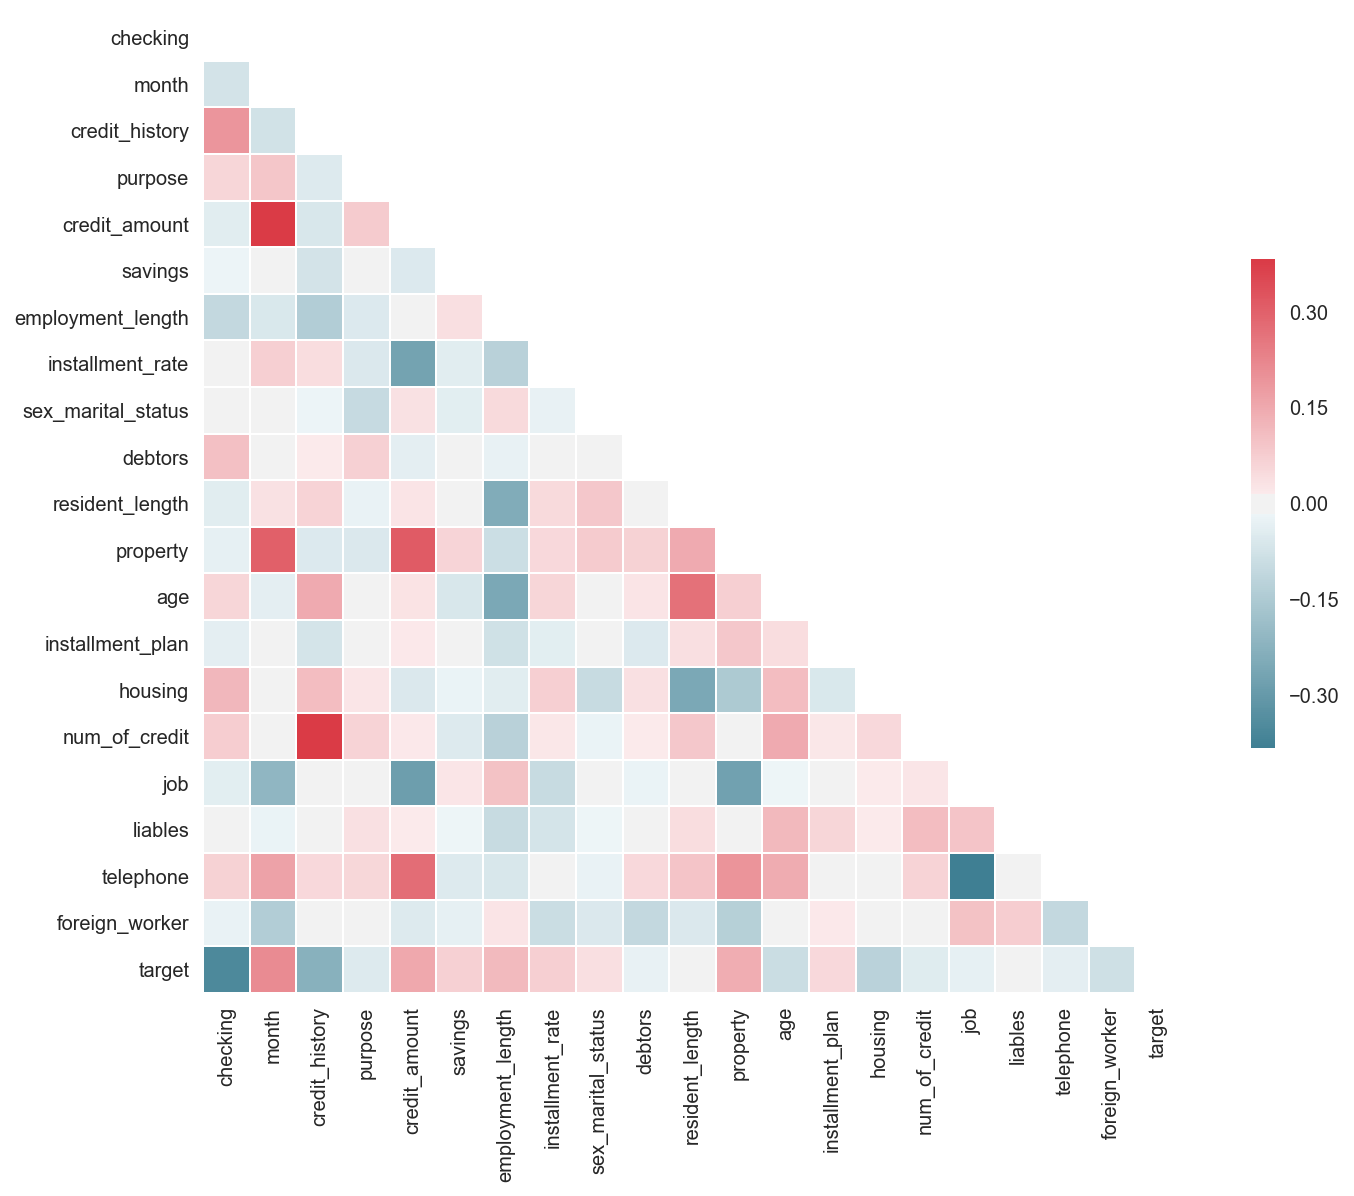

In [68]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [241]:
# Separate target from variables
X = df.drop('target', 1)
y = df.target

Feature ranking:
1. feature checking (0.122755)
2. feature month (0.080163)
3. feature credit_history (0.078961)
4. feature purpose (0.066972)
5. feature credit_amount (0.062754)
6. feature savings (0.059529)
7. feature employment_length (0.056696)
8. feature installment_rate (0.051439)
9. feature sex_marital_status (0.049519)
10. feature debtors (0.049379)
11. feature resident_length (0.048278)
12. feature property (0.043470)
13. feature age (0.043191)
14. feature installment_plan (0.038755)
15. feature housing (0.031484)
16. feature num_of_credit (0.031396)
17. feature job (0.030146)
18. feature liables (0.024734)
19. feature telephone (0.022189)
20. feature foreign_worker (0.008188)


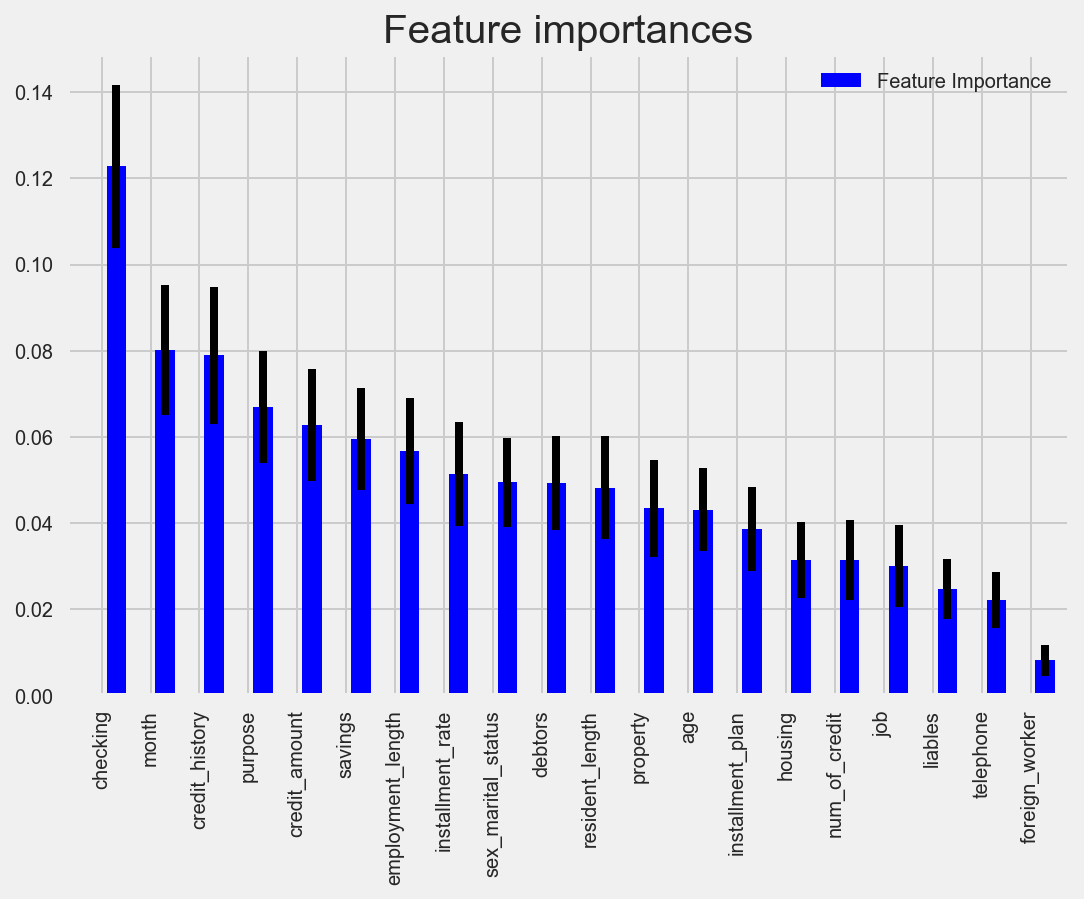

In [70]:
# Use Extra Trees Classifier to learn about feature importances

from sklearn.ensemble import ExtraTreesClassifier
plt.style.use('fivethirtyeight')

def feature_importance_eda(X, y):
    
    '''Get an estimate of the feature importance of data'''
    
    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    
    #For correlation comparison
    data = pd.concat([X, y], axis=1)
    d = data.corr().iloc[:,-1][:-1]
    absolute = d
    
    
    features = []
    columns = []
    for f, col in enumerate(X.columns):
        print("%d. feature %s (%f)" % (f + 1, col, importances[indices[f]]))
        feature = [col, importances[indices[f]], d[col]]
        features.append(feature)
        columns.append(col)
    
    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    thresh = 0.
    plt.bar([(x+0.5)*2 for x in range(X.shape[1])], importances[indices],
            yerr=std[indices], label='Feature Importance',
            color=["blue"])
    
    plt.rcParams.update({'font.size': 20})
    plt.xticks([(x*2)+0.4 for x in range(X.shape[1])], columns, rotation='vertical')
    plt.xlim([-1, (2 * X.shape[1])])
    plt.legend()
    plt.show()
    return pd.DataFrame(features, columns=['Feature', 'Importance', 'Correlation'])


#Run function
feature_importance = feature_importance_eda(X, y)

### Using ExtraTrees Classifier I was able to find the variables with the greatest modeling importance. The status of one's checking account clearly has the greatest feature importance. Since it is negatively correlated with whether or not someone is a credit risk. It is possible this feature importance shares a similar directionaly reltationship, but these importances are calculated in different fashions so the nature of their relationship is unclear. 

In [71]:
# Rank features by importance 

feature_importance

,Feature,Importance,Correlation
0,checking,0.122755,-0.350847
1,month,0.080163,0.214927
2,credit_history,0.078961,-0.228785
3,purpose,0.066972,-0.048189
4,credit_amount,0.062754,0.154739
5,savings,0.059529,0.069078
6,employment_length,0.056696,0.116002
7,installment_rate,0.051439,0.072404
8,sex_marital_status,0.049519,0.041598
9,debtors,0.049379,-0.028441


In [242]:
# Standardize and scale data

from sklearn.preprocessing import MinMaxScaler
def scale_dataframe(df):
    '''Scale DataFrame between 0 and 1'''
    scaler = MinMaxScaler()
    df_scale = scaler.fit_transform(df)
    data = pd.DataFrame(df_scale, columns=df.columns)
    return data

In [243]:
df = scale_dataframe(df)

In [244]:
df.head()

,checking,month,credit_history,purpose,credit_amount,savings,employment_length,installment_rate,sex_marital_status,debtors,resident_length,property,age,installment_plan,housing,num_of_credit,job,liables,telephone,foreign_worker,target
0,0.000000,0.029412,1.00,0.6,0.050567,0.25,0.00,1.000000,0.666667,1.0,1.000000,0.000000,0.857143,0.5,1.0,0.333333,0.333333,0.0,1.0,0.0,0.0
1,0.333333,0.647059,0.50,0.6,0.313690,0.50,0.50,0.333333,1.000000,1.0,0.333333,0.000000,0.053571,0.5,1.0,0.000000,0.333333,0.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.1,0.101574,0.50,0.25,0.333333,0.666667,1.0,0.666667,0.000000,0.535714,0.5,1.0,0.000000,0.666667,1.0,0.0,0.0,0.0
3,0.000000,0.558824,0.50,0.5,0.419941,0.50,0.25,0.333333,0.666667,0.5,1.000000,0.333333,0.464286,0.5,0.5,0.000000,0.333333,1.0,0.0,0.0,0.0
4,0.000000,0.294118,0.75,0.7,0.254209,0.50,0.50,0.666667,0.666667,1.0,1.000000,1.000000,0.607143,0.5,0.5,0.333333,0.333333,1.0,0.0,0.0,1.0


In [247]:
# Separate variables again, after normalization
X = df.drop('target', 1)
y = df.target

# Build first Neural Network:
## This is a basic neural network, non-recurrent, and only uses relu and sigmoid functions (or softmax, a variation of a sigmoid function better for binary classification)

In [76]:
# Standard neural network got a ROC Score of  0.725842844125
# Not super awesome, lets see what happens when we change some things

In [203]:
import pandas as pd
import numpy as np
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

def basic_scale_nn(X_nn, y_nn):
    '''Scale data to fit Keras NN input format'''
    
    #Import Scaler to standardize variable data
    scaler = StandardScaler()
    X_nn = scaler.fit_transform(X_nn)
    
    #Use keras utils to format target data
    y_nn = np_utils.to_categorical(y_nn)
    
    return X_nn, y_nn
    
    
def basic_build_nn(X_nn, y_nn, input_dim):
    '''Build your Neural Network structure'''
    
    # Train test split your data to prevent over fitting
    X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn)
    
    # Initialize your sequential NN
    # You can change the model to something other than sequential, for more info check Keras' documentation.
    model = Sequential()
    model.add(Dense(2, input_dim=input_dim))
    model.add(Dense(y_nn_test.shape[1], kernel_initializer='normal', activation='softmax'))
    
    # Lastly you want to define your loss function, your optimizer and your metric for scoring.
    # This will vary based on your goals, but for a binary target this parameter configuration
    # works well. 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Return your neural network
    return model
def basic_run_nn(X_nn, y_nn, num_folds):
    '''Run your neural network and output your prediction probabilities'''
    
    # Initialize the roc-auc score running average list
    # Initialize a count to print the number of folds
    av_roc = 0.
    count = 0
    
    # Run the standard scaler function we defined before
    X_nn, y_nn = basic_scale_nn(X_nn, y_nn)
    
    # Initialize your cross vailidation
    # Set shuffle equals True to randomize your splits on your training data
    kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
    
    # Set up for loop to run for the number of cross vals you defined in your parameter
    for train_index, test_index in kf.split(X_nn):
        count += 1
        print 'Fold #: ', count
        
        # This indexs your train and test data for your cross validation and sorts them
        # in random order, since we used shuffle equals True
        X_nn_train, X_nn_test = X_nn[train_index], X_nn[test_index]
        y_nn_train, y_nn_test = y_nn[train_index], y_nn[test_index]
        
        # Define your input dimension, which must equal the number of variables in your
        # training data. If it does not you will get a goofy error.
        input_dim = X_nn_train.shape[1]
        
        # Initialize your neural network structure we defined above to build your model
        print("Building model...")
        model = basic_build_nn(X_nn, y_nn, input_dim)
        
        # Fit your model
        # You can select the number of epochs and and batch size you would like to use
        # for your neural network. 
        print("Training model...")
        model.fit(X_nn_train, y_nn_train, epochs=15, batch_size=30, verbose=0)
        
        # Your model is fit. Time to predict our output and test our training data
        print("Evaluating model...")
        test_preds = model.predict_proba(X_nn_test, verbose=1)
        roc = roc_auc_score(y_nn_test, test_preds)
        scores = model.evaluate(X_nn_test, y_nn_test)
        print scores
        
        # Print your model summary
        print model.summary()
        
        # Print your ROC-AUC score for your kfold, and the running score average
        print 'ROC: ', roc
        av_roc += roc
        print 'Continued Avg: ', av_roc/count
        
    # Print your final average ROC-AUC score and organize your models predictions in a dataframe
    print('Average ROC:', av_roc/num_folds)
    predict_proba_all = pd.DataFrame(model.predict_proba(X_nn, verbose=0))
    return pd.DataFrame(predict_proba_all)


# IMPORTANT Only inputs you need to change
# nn = basic_run_nn(X, y, 2)

In [248]:
import pandas as pd
import numpy as np
from keras import initializers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

def scale_nn(X_nn, y_nn):
    '''Scale data to fit Keras NN input format'''
    
    #Import Scaler to standardize variable data
    scaler = StandardScaler()
    X_nn = scaler.fit_transform(X_nn)
    
    #Use keras utils to format target data
    y_nn = np_utils.to_categorical(y_nn)
    
    return X_nn, y_nn
    
    
def build_nn(X_nn, y_nn, input_dim):
    '''Build your Neural Network structure'''
    
    # Train test split your data to prevent over fitting
    X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn)
    
    # Initialize your sequential NN
    # You can change the model to something other than sequential, for more info check Keras' documentation.
    model = Sequential()
    model.add(Dense(300, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    
    # Build the second layer of your neural network
    model.add(Dense(300, kernel_initializer='normal', activation='relu'))
    model.add(Dense(y_nn_test.shape[1], kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Return your neural network
    return model
def run_nn(X_nn, y_nn, num_folds):
    '''Run your neural network and output your prediction probabilities'''
    
    # Initialize the roc-auc score running average list
    # Initialize a count to print the number of folds
    av_roc = 0.
    count = 0
    
    # Run the standard scaler function we defined before
    X_nn, y_nn = scale_nn(X_nn, y_nn)
    
    # Initialize your cross vailidation
    # Set shuffle equals True to randomize your splits on your training data
    kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
    
    # Set up for loop to run for the number of cross vals you defined in your parameter
    for train_index, test_index in kf.split(X_nn):
        count += 1
        print 'Fold #: ', count
        
        # This indexs your train and test data for your cross validation and sorts them
        # in random order, since we used shuffle equals True
        X_nn_train, X_nn_test = X_nn[train_index], X_nn[test_index]
        y_nn_train, y_nn_test = y_nn[train_index], y_nn[test_index]
        
        # Define your input dimension, which must equal the number of variables in your
        # training data. If it does not you will get a goofy error.
        input_dim = X_nn_train.shape[1]
        
        # Initialize your neural network structure we defined above to build your model
        print("Building model...")
        model = build_nn(X_nn, y_nn, input_dim)
        
        # Fit your model
        # You can select the number of epochs and and batch size you would like to use
        # for your neural network. 
        print("Training model...")
        model.fit(X_nn_train, y_nn_train, epochs=15, batch_size=30, verbose=0)
        
        # Your model is fit. Time to predict our output and test our training data
        print("Evaluating model...")
        predictions = model.predict(X_nn_test, verbose=1)
        test_preds = model.predict_proba(X_nn_test, verbose=1)
        roc = roc_auc_score(y_nn_test, test_preds)
        scores = model.evaluate(X_nn_test, y_nn_test)
        print scores
        
        # Print your model summary
        print model.summary()
        
        # Print your ROC-AUC score for your kfold, and the running score average
        print 'ROC: ', roc
        av_roc += roc
        print 'Continued Avg: ', av_roc/count
        
    # Print your final average ROC-AUC score and organize your models predictions in a dataframe
    print('Average ROC:', av_roc/num_folds)
    predict_proba_all = pd.DataFrame(model.predict_proba(X_nn, verbose=0))
    return pd.DataFrame(predict_proba_all)


# IMPORTANT Only inputs you need to change
nn = run_nn(X, y, 2)

Fold #:  1
Building model...
Training model...
Evaluating model...
 32/500 [>.............................] - ETA: 0s[0.88660323190689083, 0.68999999999999995]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 300)               6300      
_________________________________________________________________
dense_109 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 602       
Total params: 97,202
Trainable params: 97,202
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.726978207229
Continued Avg:  0.726978207229
Fold #:  2
Building model...
Training model...
Evaluating model...
 32/500 [>.............................] - ETA: 0s[0.81551106834411624, 0.68800000095367431]
_________________________

### Create recurrent neural network model. 

In [251]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU
from keras import metrics
import keras.backend as K
import time

## "Long Short Term Memory default parameters

# keras.layers.recurrent.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid',use_bias=True,
#                             kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
#                             bias_initializer='zeros',unit_forget_bias=True, kernel_regularizer=None,
#                             recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None,
#                             kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
#                             dropout=0.0, recurrent_dropout=0.0)

def scale_nn(X_nn, y_nn):
    '''Scale data to fit Keras NN input format'''
    
    #Import Scaler to standardize variable data
    scaler = StandardScaler()
    X_nn = scaler.fit_transform(X_nn)
    
    #Use keras utils to format target data
    y_nn = np_utils.to_categorical(y_nn)
    
    return X_nn, y_nn

# Build 'Long Short Term Memorory' neural network.
# Theoretically the best neural network for binary classification



def build_recurrent_nn(X_nn, y_nn, data_dim, timesteps, batch_size, layer_size1, layer_size2, layer_size3, alpha1, alpha2):
    
    X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn)
    input_dim = X_nn_train.shape[1]
    output_dim = y_nn_train.shape[1]
    batch_input_shape = (batch_size, timesteps, data_dim)
    
    
    # expected input data shape: (batch_size, timesteps, data_dim)
    model = Sequential()
    model.add(LSTM(layer_size1, return_sequences=True, input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension layer size
    model.add(LeakyReLU(alpha=alpha1))
    model.add(LSTM(layer_size2, return_sequences=True))  # returns a sequence of vectors of dimension layer size
    model.add(LeakyReLU(alpha=alpha2))
    model.add(LSTM(layer_size3))    
    model.add(LeakyReLU(alpha=alpha1))
    model.add(Dense(2, activation='softmax'))
    
    start = time.time()
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    print('Compilation time : ', time.time() - start)
    return model

def build_recurrent_lstm_nn(X_nn, y_nn, data_dim, timesteps, batch_size, layer_size1, layer_size2, layer_size3, alpha1, alpha2):
    
    X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn)
    input_dim = X_nn_train.shape[1]
    output_dim = y_nn_train.shape[1]
    batch_input_shape = (batch_size, timesteps, data_dim)
    
    
    # expected input data shape: (batch_size, timesteps, data_dim)
    model = Sequential()
    model.add(LSTM(layer_size1, return_sequences=True, input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension layer size
    model.add(LSTM(layer_size2, return_sequences=True))  # returns a sequence of vectors of dimension layer size
    model.add(LSTM(layer_size3))  # return a single vector of dimension 32
    model.add(Dense(2, activation='softmax'))
    
    start = time.time()
    model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
    print('Compilation time : ', time.time() - start)
    return model


In [253]:
def run_recurrent_lstm_nn(X_nn, y_nn, num_folds, epochs, batch_size, layer_size1, layer_size2, layer_size3, alpha1, alpha2):
    '''Run your neural network and output your prediction probabilities'''
    
    # Initialize the roc-auc score running average list
    # Initialize a count to print the number of folds
    av_roc = 0.
    count = 0
    
    # Run the standard scaler function we defined before
    X_nn, y_nn = scale_nn(X_nn, y_nn)
    
    # Initialize your cross vailidation
    # Set shuffle equals True to randomize your splits on your training data
    kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
    
    # Set up for loop to run for the number of cross vals you defined in your parameter
    for train_index, test_index in kf.split(X_nn):
        count += 1
        print ('Fold #: ', count)
        

        # This indexs your train and test data for your cross validation and sorts them
        # in random order, since we used shuffle equals True
        X_nn_train, X_nn_test = X_nn[train_index], X_nn[test_index]
        y_nn_train, y_nn_test = y_nn[train_index], y_nn[test_index]
        
        data_dim = 1
        timesteps = X_nn_train.shape[1]
        num_classes = y_nn_train.shape[1]
        batch_size = batch_size
        
        X_nn = np.reshape(X_nn, (X_nn.shape[0], X_nn.shape[1], 1))
        X_nn_train = np.reshape(X_nn_train, (X_nn_train.shape[0], X_nn_train.shape[1], 1))
        X_nn_test = np.reshape(X_nn_test, (X_nn_test.shape[0], X_nn_test.shape[1], 1))
        # Define your input dimension, which must equal the number of variables in your
        # training data. If it does not you will get a goofy error.
        input_dim = X_nn_train.shape[1]
        input_shape = X_nn_train.shape
        
        # Initialize your neural network structure we defined above to build your model
        print("Building model...")
        model = build_recurrent_lstm_nn(X_nn_train, y_nn_train, data_dim, timesteps, batch_size,
                                   layer_size1, layer_size2, layer_size3, alpha1, alpha2)
        
        # Fit your model
        # You can select the number of epochs and and batch size you would like to use
        # for your neural network. 
        print("Training model...")
        
        start = time.time()
        model.fit(X_nn_train, y_nn_train, epochs=epochs, batch_size=batch_size, verbose=1,
                  validation_data=(X_nn_test, y_nn_test))
        print('Training time : ', time.time() - start)
        
        # Your model is fit. Time to predict our output and test our training data
        print("Evaluating model...")
        start = time.time()
        test_preds = model.predict_proba(X_nn_test, verbose=1)
        roc = roc_auc_score(y_nn_test, test_preds)
#         scores = model.evaluate(X_nn_test, y_nn_test)
#         print (scores)

        
        # Print your ROC-AUC score for your kfold, and the running score average
        print '\n','ROC: ', roc
        av_roc += roc
        print ('Continued Avg: ', av_roc/count)
        print('Evaluation time : ', time.time() - start)
        
    # Print your final average ROC-AUC score and organize your models predictions in a dataframe
    print('Average ROC:', av_roc/num_folds)
    predict_proba_all = pd.DataFrame(model.predict_proba(X_nn_test, verbose=1))
    return roc, predict_proba_all

In [249]:
def run_recurrent_nn(X_nn, y_nn, num_folds, epochs, batch_size, layer_size1, layer_size2, layer_size3, alpha1, alpha2):
    '''Run your neural network and output your prediction probabilities'''
    
    # Initialize the roc-auc score running average list
    # Initialize a count to print the number of folds
    av_roc = 0.
    count = 0
    
    # Run the standard scaler function we defined before
    X_nn, y_nn = scale_nn(X_nn, y_nn)
    
    # Initialize your cross vailidation
    # Set shuffle equals True to randomize your splits on your training data
    kf = KFold(n_splits=num_folds, random_state=41, shuffle=True)
    
    # Set up for loop to run for the number of cross vals you defined in your parameter
    for train_index, test_index in kf.split(X_nn):
        count += 1
        print ('Fold #: ', count)
        

        # This indexs your train and test data for your cross validation and sorts them
        # in random order, since we used shuffle equals True
        X_nn_train, X_nn_test = X_nn[train_index], X_nn[test_index]
        y_nn_train, y_nn_test = y_nn[train_index], y_nn[test_index]
        
        data_dim = 1
        timesteps = X_nn_train.shape[1]
        num_classes = y_nn_train.shape[1]
        batch_size = batch_size
        
        X_nn = np.reshape(X_nn, (X_nn.shape[0], X_nn.shape[1], 1))
        X_nn_train = np.reshape(X_nn_train, (X_nn_train.shape[0], X_nn_train.shape[1], 1))
        X_nn_test = np.reshape(X_nn_test, (X_nn_test.shape[0], X_nn_test.shape[1], 1))
        # Define your input dimension, which must equal the number of variables in your
        # training data. If it does not you will get a goofy error.
        input_dim = X_nn_train.shape[1]
        input_shape = X_nn_train.shape
        
        # Initialize your neural network structure we defined above to build your model
        print("Building model...")
        model = build_recurrent_nn(X_nn_train, y_nn_train, data_dim, timesteps, batch_size,
                                   layer_size1, layer_size2, layer_size3, alpha1, alpha2)
        
        # Fit your model
        # You can select the number of epochs and and batch size you would like to use
        # for your neural network. 
        print("Training model...")
        
        start = time.time()
        model.fit(X_nn_train, y_nn_train, epochs=epochs, batch_size=batch_size, verbose=1,
                  validation_data=(X_nn_test, y_nn_test))
        print('Training time : ', time.time() - start)
        
        # Your model is fit. Time to predict our output and test our training data
        print("Evaluating model...")
        start = time.time()
        test_preds = model.predict_proba(X_nn_test, verbose=1)
        roc = roc_auc_score(y_nn_test, test_preds)
#         scores = model.evaluate(X_nn_test, y_nn_test)
#         print (scores)

        
        # Print your ROC-AUC score for your kfold, and the running score average
        print '\n','ROC: ', roc
        av_roc += roc
        print ('Continued Avg: ', av_roc/count)
        print('Evaluation time : ', time.time() - start)
        
    # Print your final average ROC-AUC score and organize your models predictions in a dataframe
    print('Average ROC:', av_roc/num_folds)
    predict_proba_all = pd.DataFrame(model.predict_proba(X_nn_test, verbose=1))
    return roc, predict_proba_all

In [250]:
# A slightly better score with the recurrent neural network using Long Short Term memory and Leaky Relu
nn= run_recurrent_nn(X, y, 2, 50, 50, 150, 32, 32, .00000001e-08, 1.0)

('Fold #: ', 1)
Building model...
('Compilation time : ', 0.011560916900634766)
Training model...
Train on 500 samples, validate on 500 samples
Epoch 1/50
500/500 [==============================] - 1s - loss: 0.6625 - acc: 0.6560 - val_loss: 0.6234 - val_acc: 0.6940
Epoch 2/50
500/500 [==============================] - 1s - loss: 0.6064 - acc: 0.7060 - val_loss: 0.6124 - val_acc: 0.6940
Epoch 3/50
500/500 [==============================] - 0s - loss: 0.5993 - acc: 0.7060 - val_loss: 0.6062 - val_acc: 0.6940
Epoch 4/50
500/500 [==============================] - 1s - loss: 0.6016 - acc: 0.7020 - val_loss: 0.6034 - val_acc: 0.6940
Epoch 5/50
500/500 [==============================] - 1s - loss: 0.5935 - acc: 0.7060 - val_loss: 0.6015 - val_acc: 0.6940
Epoch 6/50
500/500 [==============================] - 1s - loss: 0.5804 - acc: 0.7060 - val_loss: 0.5923 - val_acc: 0.6940
Epoch 7/50
500/500 [==============================] - 1s - loss: 0.5795 - acc: 0.7060 - val_loss: 0.5928 - val_acc: 0.

500/500 [==============================] - 1s - loss: 0.6118 - acc: 0.6940 - val_loss: 0.5937 - val_acc: 0.7060
Epoch 14/50
500/500 [==============================] - 1s - loss: 0.6082 - acc: 0.6940 - val_loss: 0.5900 - val_acc: 0.7060
Epoch 15/50
500/500 [==============================] - 1s - loss: 0.5988 - acc: 0.6940 - val_loss: 0.5892 - val_acc: 0.7060
Epoch 16/50
500/500 [==============================] - 1s - loss: 0.5962 - acc: 0.6940 - val_loss: 0.5880 - val_acc: 0.7060
Epoch 17/50
500/500 [==============================] - 1s - loss: 0.5986 - acc: 0.6940 - val_loss: 0.5876 - val_acc: 0.7060
Epoch 18/50
500/500 [==============================] - 1s - loss: 0.5897 - acc: 0.6940 - val_loss: 0.5745 - val_acc: 0.7060
Epoch 19/50
500/500 [==============================] - 1s - loss: 0.5919 - acc: 0.6940 - val_loss: 0.5727 - val_acc: 0.7060
Epoch 20/50
500/500 [==============================] - 1s - loss: 0.5943 - acc: 0.6940 - val_loss: 0.5727 - val_acc: 0.7060
Epoch 21/50
500/500 

In [106]:
# Now lets changes some of the layer sizes, epochs, and leaky relu learning rates to see how it affects our output
nn= run_recurrent_nn(X, y, 2, 50, 50, 300, 300, 32, .00000001e-08, .00000001e-08)

# These small changes made my model worse, with a score of 0.66115661240834733
# The question is why, what is it doing differently other than increasing the amount of outputs a layer has 
# Why it does this is somewhat unclear and not well understood. Typically adding more layers makes your model better,
# however, in this case it made my model worse and I am not using dropout to prevent overfitting. 

('Fold #: ', 1)
Building model...
('Compilation time : ', 0.012295007705688477)
Training model...
Train on 500 samples, validate on 500 samples
Epoch 1/50
500/500 [==============================] - 3s - loss: 0.6488 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6327 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 2/50
500/500 [==============================] - 3s - loss: 0.6123 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6168 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 3/50
500/500 [==============================] - 3s - loss: 0.6079 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6193 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 4/50
500/500 [==============================] - 3s - loss: 0.6057 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6154 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 5/50
500/500 [==============================] - 3s - loss: 0.6059 - acc: 0.7060 - categorical_

500/500 [==============================] - 3s - loss: 0.5576 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.5998 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 44/50
500/500 [==============================] - 3s - loss: 0.5570 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6001 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 45/50
500/500 [==============================] - 3s - loss: 0.5578 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6014 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 46/50
500/500 [==============================] - 3s - loss: 0.5581 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.5996 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 47/50
500/500 [==============================] - 3s - loss: 0.5579 - acc: 0.7060 - categorical_accuracy: 0.7060 - val_loss: 0.6018 - val_acc: 0.6940 - val_categorical_accuracy: 0.6940
Epoch 48/50
500/500 [==============================] - 3s - lo

500/500 [==============================] - 3s - loss: 0.5305 - acc: 0.7300 - categorical_accuracy: 0.7300 - val_loss: 0.5515 - val_acc: 0.7240 - val_categorical_accuracy: 0.7240
Epoch 35/50
500/500 [==============================] - 3s - loss: 0.5244 - acc: 0.7300 - categorical_accuracy: 0.7300 - val_loss: 0.5444 - val_acc: 0.7420 - val_categorical_accuracy: 0.7420
Epoch 36/50
500/500 [==============================] - 3s - loss: 0.5288 - acc: 0.7400 - categorical_accuracy: 0.7400 - val_loss: 0.5381 - val_acc: 0.7300 - val_categorical_accuracy: 0.7300
Epoch 37/50
500/500 [==============================] - 3s - loss: 0.5166 - acc: 0.7400 - categorical_accuracy: 0.7400 - val_loss: 0.5435 - val_acc: 0.7260 - val_categorical_accuracy: 0.7260
Epoch 38/50
500/500 [==============================] - 3s - loss: 0.5169 - acc: 0.7360 - categorical_accuracy: 0.7360 - val_loss: 0.5580 - val_acc: 0.7280 - val_categorical_accuracy: 0.7280
Epoch 39/50
500/500 [==============================] - 3s - lo

## Since it is very unclear how different attributes in the neural network affect the outcome I ran my neural network 144 times in a google cloud server to see what changes had what affects. 

In [113]:
import itertools

# Parameters testing for on Google Datalab. Importing the results of the grid search to learn more.

epoch = np.array([100])
batch_size = np.array([50, 5])
layer_size1 = np.array([300, 500, 1000])
layer_size2 = np.array([12, 32])
layer_size3 = np.array([6, 12, 32])
alpha1 = np.array([1e-5, 1])
alpha2 = np.array([1e-5, 1])

param_grids = [epoch, batch_size, layer_size1, layer_size2, layer_size3, alpha1, alpha2]

pg = list(itertools.product(*param_grids))

In [114]:
len(pg)
# 144 grid search trials are occuring. This takes about 30 hours. 

144

These are the paramters from running them in the cloud for 100 hours. 

In [126]:
params = pd.read_csv('/Users/joeklein/Downloads/updating_scores (12).csv', index_col=0)

In [127]:
new_list = []
news = []
for item in params.paramaters:
    splits = item.split(', ')
    splits[0] = splits[0].replace('[', '')
    splits[-1] = splits[-1].replace(']', '')
    new_list.append(splits)

In [128]:
# 30 different neural network test I was able to run in 100 hours. I wanted to run more, but it is time consuming. 
params

,scores,paramaters
0,0.676906,"[100, 50, 500, 12, 12, 1.0000000000000001e-05,..."
1,0.680650,"[100, 50, 500, 12, 12, 1.0000000000000001e-05,..."
2,0.721108,"[100, 50, 500, 12, 6, 1.0, 1.0]"
3,0.693112,"[100, 50, 500, 12, 6, 1.0, 1.0000000000000001e..."
4,0.703824,"[100, 50, 500, 12, 6, 1.0000000000000001e-05, ..."
5,0.737026,"[100, 50, 500, 12, 6, 1.0000000000000001e-05, ..."
6,0.694990,"[100, 50, 300, 32, 32, 1.0, 1.0]"
7,0.679242,"[100, 50, 300, 32, 32, 1.0, 1.0000000000000001..."
8,0.733484,"[100, 50, 300, 32, 32, 1.0000000000000001e-05,..."
9,0.656805,"[100, 50, 300, 32, 32, 1.0000000000000001e-05,..."


In [135]:
parm = pd.DataFrame(new_list, columns = ['epochs', 'batch_size', 'layer_size1', 'layer_size2', 'layer_size3', 'alpha1', 'alpha2'])

In [137]:
# Put parameters into dataframe
parm['target'] = params.scores

In [138]:
parm.head()

,epochs,batch_size,layer_size1,layer_size2,layer_size3,alpha1,alpha2,target
0,100,50,500,12,12,1.0000000000000001e-05,1.0,0.676906
1,100,50,500,12,12,1.0000000000000001e-05,1.0000000000000001e-05,0.680650
2,100,50,500,12,6,1.0,1.0,0.721108
3,100,50,500,12,6,1.0,1.0000000000000001e-05,0.693112
4,100,50,500,12,6,1.0000000000000001e-05,1.0,0.703824


In [139]:
parm.to_csv('nn_scores.csv')

In [140]:
eda_df.eda_helper(parm)

,data_type,null_count,unique_count
epochs,{str},0,1
batch_size,{str},0,1
layer_size1,{str},0,2
layer_size2,{str},0,2
layer_size3,{str},0,3
alpha1,{str},0,2
alpha2,{str},0,2
target,{float64},0,30


In [141]:
for col in parm.columns:
    parm[col] = parm[col].astype(float)

In [142]:
eda_df.eda_helper(parm)

,data_type,null_count,unique_count
epochs,{float64},0,1
batch_size,{float64},0,1
layer_size1,{float64},0,2
layer_size2,{float64},0,2
layer_size3,{float64},0,3
alpha1,{float64},0,2
alpha2,{float64},0,2
target,{float64},0,30


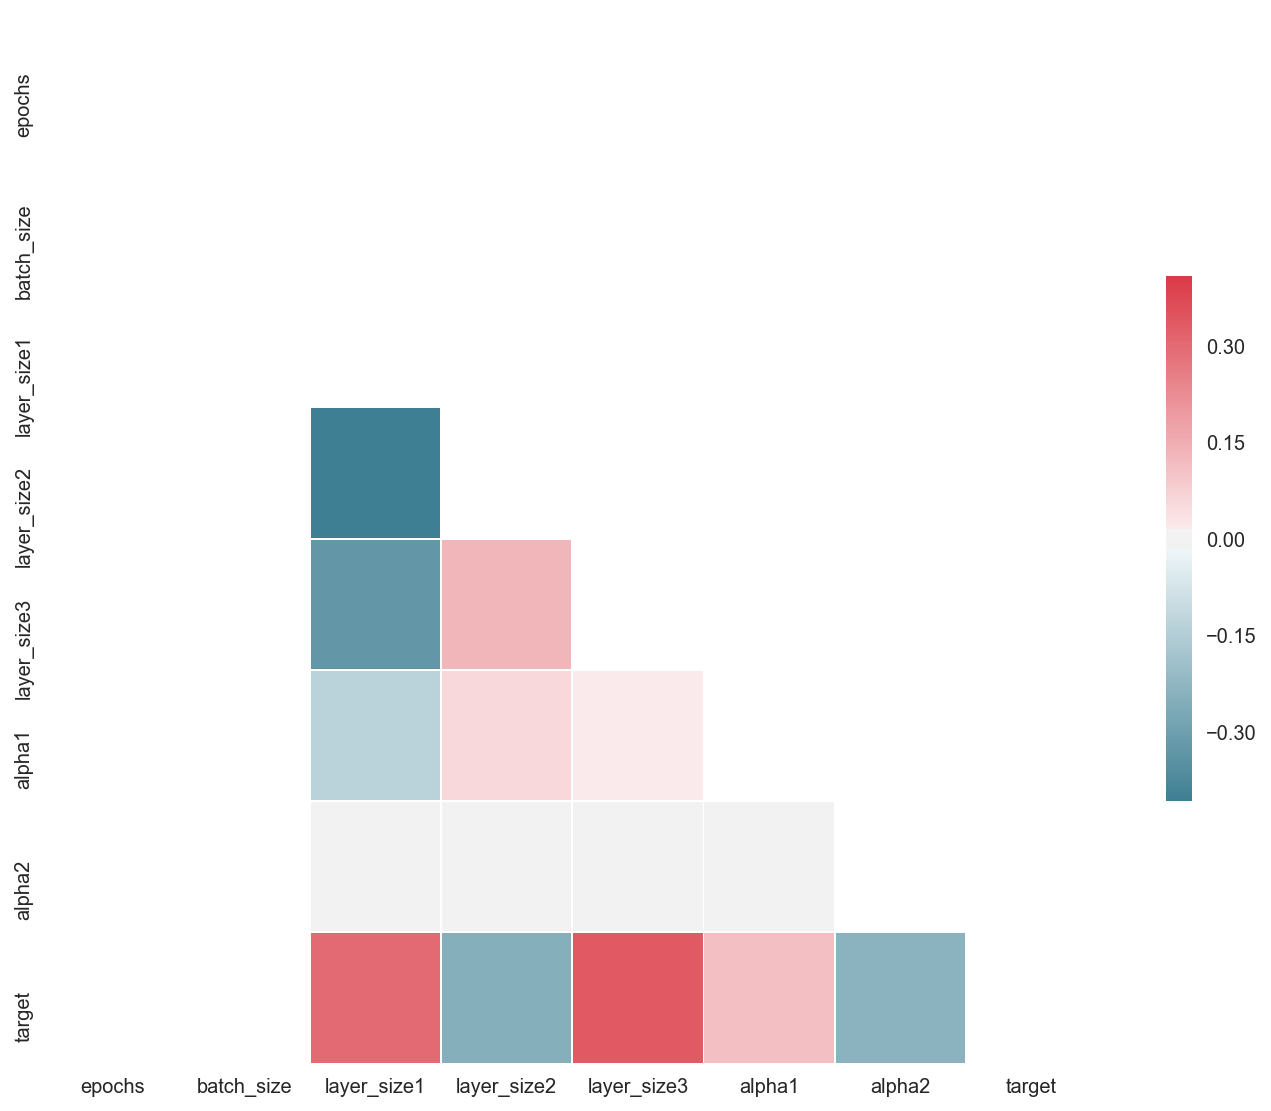

In [143]:
sns.set(style="white")

# Compute the correlation matrix
corr = parm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Layers size one and three seem to have the largest positive correlation with a good target score. layer size 2 and alpha are negatively correlated which would mean that higher values correlated for alpha 2 and layer 2 tend to produce lower scores. 

In [144]:
X = parm.drop('target', 1)
y = parm.target

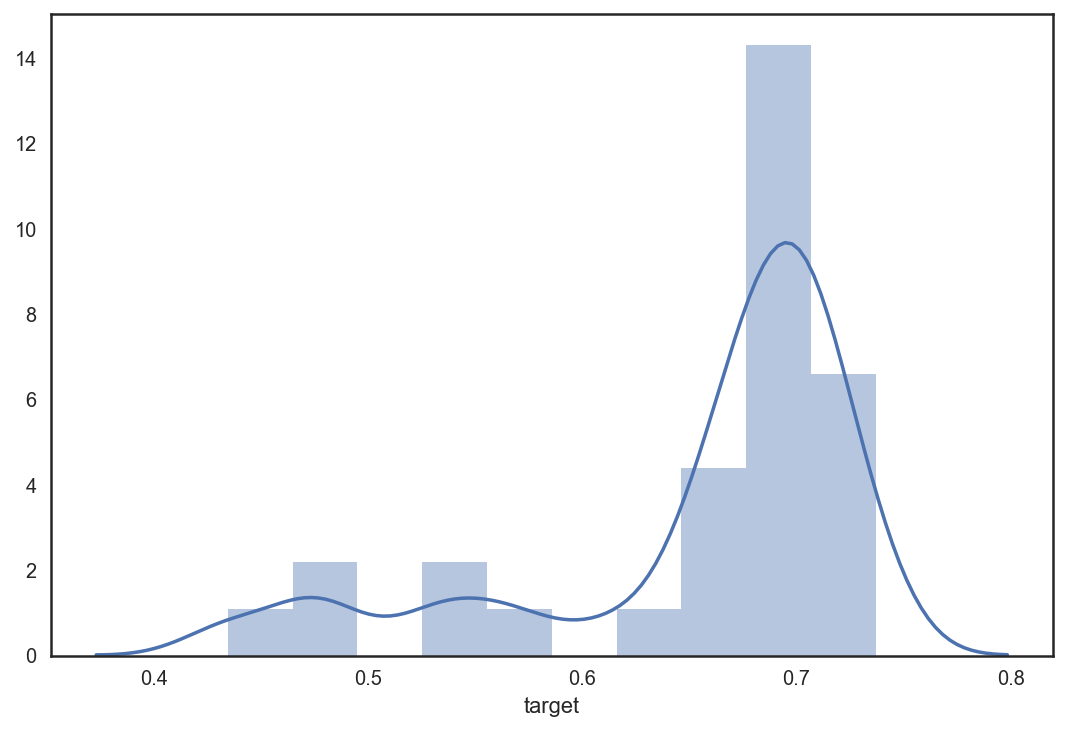

In [147]:
# Look at roc score distribution

sns.distplot(y)

In [148]:
from sklearn.preprocessing import MinMaxScaler

# Standardize data

def scale_dataframe(df):
    '''Scale DataFrame between 0 and 1'''
    scaler = MinMaxScaler()
    df_scale = scaler.fit_transform(df)
    data = pd.DataFrame(df_scale, columns=df.columns)
    return data

In [149]:
n_param = scale_dataframe(parm)

In [150]:
X = n_param.drop('target', 1)
y = n_param.target

In [175]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics


# Use XGBoost to build a model about my models'parameters to change them to more aptly optimize my function. 

X_train, X_test, y_train, y_test = train_test_split(X, y)


best_xgb = XGBClassifier()


best_xgb.fit(X_train, y_train)


# cv = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=41)

# s = cross_val_score(best_xgb, X_train, y_train, cv=cv, n_jobs=-1)
# print "{} Score:\t{:0.3} ± {:0.3}".format('XGBoost Classifier CV ', s.mean().round(3), s.std().round(3))

#Predict training set:
X_test_predictions = best_xgb.predict(X_test)
X_test_predprob = best_xgb.predict_proba(X_test)[:,1]

#Print model report:
print "\nModel Report"
print "Mean Squared Error : %.4g" % metrics.mean_squared_error(y_test.values, X_test_predictions)
print "R2 Score (Test): %f" % metrics.r2_score(y_test, X_test_predictions)

feature_importances = pd.DataFrame(best_xgb.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print feature_importances




Model Report
Mean Squared Error : 0.5666
R2 Score (Test): -10.169848
             importance
epochs              NaN
batch_size          NaN
layer_size1         NaN
layer_size2         NaN
layer_size3         NaN
alpha1              NaN
alpha2              NaN


This was not very useful, largely because the I have such small dataset. 30 samples is not large enough to build a good model. All in all I have concluded nothing. 

In [176]:
from sklearn import datasets

In [200]:
test2 = datasets.load_breast_cancer()

In [ ]:
# Test simple neural network on sklearns breast cancer dataset

In [205]:
nn_2 = basic_run_nn(test2.data, test2.target, 2)

Fold #:  1
Building model...
Training model...
Evaluating model...
 32/285 [==>...........................] - ETA: 0s[0.23847506741682689, 0.95789473914263545]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2)                 62        
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 6         
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.991612301957
Continued Avg:  0.991612301957
Fold #:  2
Building model...
Training model...
Evaluating model...
 32/284 [==>...........................] - ETA: 0s[0.28413807212466924, 0.90140845238322942]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (Non

In [ ]:
# Test normal neural network on sklearns breast cancer dataset

In [206]:
nn_2 = run_nn(test2.data, test2.target, 2)

Fold #:  1
Building model...
Training model...
Evaluating model...
 32/285 [==>...........................] - ETA: 0s[0.15355980589724424, 0.97192982267915162]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 300)               9300      
_________________________________________________________________
dense_63 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 602       
Total params: 100,202
Trainable params: 100,202
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.986577094336
Continued Avg:  0.986577094336
Fold #:  2
Building model...
Training model...
Evaluating model...
 32/284 [==>...........................] - ETA: 0s[0.19644165247626288, 0.96126760731280692]
_______________________

In [ ]:
# Test recurrent neural network on sklearns breast cancer dataset

In [212]:
rec_nn_2 = run_recurrent_nn(test2.data, test2.target, 2, 50, 50, 150, 32, 32, .00000001e-08, 1.0)

('Fold #: ', 1)
Building model...
('Compilation time : ', 0.013607978820800781)
Training model...
Train on 284 samples, validate on 285 samples
Epoch 1/50
284/284 [==============================] - 0s - loss: 0.6154 - acc: 0.7852 - categorical_accuracy: 0.7852 - val_loss: 0.3647 - val_acc: 0.9158 - val_categorical_accuracy: 0.9158
Epoch 2/50
284/284 [==============================] - 0s - loss: 0.3360 - acc: 0.8979 - categorical_accuracy: 0.8979 - val_loss: 0.2377 - val_acc: 0.9333 - val_categorical_accuracy: 0.9333
Epoch 3/50
284/284 [==============================] - 0s - loss: 0.2795 - acc: 0.9120 - categorical_accuracy: 0.9120 - val_loss: 0.2923 - val_acc: 0.8912 - val_categorical_accuracy: 0.8912
Epoch 4/50
284/284 [==============================] - 0s - loss: 0.2821 - acc: 0.9014 - categorical_accuracy: 0.9014 - val_loss: 0.2799 - val_acc: 0.8982 - val_categorical_accuracy: 0.8982
Epoch 5/50
284/284 [==============================] - 0s - loss: 0.2929 - acc: 0.9014 - categorical_

284/284 [==============================] - 0s - loss: 0.2098 - acc: 0.9225 - categorical_accuracy: 0.9225 - val_loss: 0.1940 - val_acc: 0.9298 - val_categorical_accuracy: 0.9298
Epoch 44/50
284/284 [==============================] - 0s - loss: 0.2028 - acc: 0.9261 - categorical_accuracy: 0.9261 - val_loss: 0.1479 - val_acc: 0.9439 - val_categorical_accuracy: 0.9439
Epoch 45/50
284/284 [==============================] - 0s - loss: 0.1935 - acc: 0.9296 - categorical_accuracy: 0.9296 - val_loss: 0.1993 - val_acc: 0.9404 - val_categorical_accuracy: 0.9404
Epoch 46/50
284/284 [==============================] - 0s - loss: 0.2012 - acc: 0.9261 - categorical_accuracy: 0.9261 - val_loss: 0.1984 - val_acc: 0.9404 - val_categorical_accuracy: 0.9404
Epoch 47/50
284/284 [==============================] - 0s - loss: 0.1915 - acc: 0.9296 - categorical_accuracy: 0.9296 - val_loss: 0.1585 - val_acc: 0.9368 - val_categorical_accuracy: 0.9368
Epoch 48/50
284/284 [==============================] - 1s - lo

285/285 [==============================] - 0s - loss: 0.3078 - acc: 0.8982 - categorical_accuracy: 0.8982 - val_loss: 0.3605 - val_acc: 0.8803 - val_categorical_accuracy: 0.8803
Epoch 35/50
285/285 [==============================] - 0s - loss: 0.2783 - acc: 0.9123 - categorical_accuracy: 0.9123 - val_loss: 0.3689 - val_acc: 0.8803 - val_categorical_accuracy: 0.8803
Epoch 36/50
285/285 [==============================] - 0s - loss: 0.2505 - acc: 0.9193 - categorical_accuracy: 0.9193 - val_loss: 0.3478 - val_acc: 0.8803 - val_categorical_accuracy: 0.8803
Epoch 37/50
285/285 [==============================] - 0s - loss: 0.2376 - acc: 0.9193 - categorical_accuracy: 0.9193 - val_loss: 0.3301 - val_acc: 0.8873 - val_categorical_accuracy: 0.8873
Epoch 38/50
285/285 [==============================] - 0s - loss: 0.2187 - acc: 0.9193 - categorical_accuracy: 0.9193 - val_loss: 0.2815 - val_acc: 0.8873 - val_categorical_accuracy: 0.8873
Epoch 39/50
285/285 [==============================] - 0s - lo

In [218]:
test3 = pd.read_csv('/Users/joeklein/Documents/GA/week-7/project_4/West-Nile-Virus-Prediction/assets/train_all_weather.csv')

In [220]:
basic_nn_3 = basic_run_nn(test3.drop('WnvPresent', 1), test3.WnvPresent, 2)

Fold #:  1
Building model...
Training model...
Evaluating model...
  32/4238 [..............................] - ETA: 0s[0.19970317402043225, 0.94502123637602209]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 2)                 352       
_________________________________________________________________
dense_74 (Dense)             (None, 2)                 6         
Total params: 358
Trainable params: 358
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.752178843803
Continued Avg:  0.752178843803
Fold #:  2
Building model...
Training model...
Evaluating model...
  32/4237 [..............................] - ETA: 0s[0.18900681282126569, 0.94595232475808355]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)           

In [221]:
nn_test_3 = run_nn(test3.drop('WnvPresent', 1), test3.WnvPresent, 2)

Fold #:  1
Building model...
Training model...
Evaluating model...
3584/4238 [========================>.....] - ETA: 0s[0.5347278959516093, 0.92732420947654115]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 300)               52800     
_________________________________________________________________
dense_78 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_79 (Dense)             (None, 2)                 602       
Total params: 143,702
Trainable params: 143,702
Non-trainable params: 0
_________________________________________________________________
None
ROC:  0.757193950454
Continued Avg:  0.757193950454
Fold #:  2
Building model...
Training model...
Evaluating model...
2944/4237 [===================>..........] - ETA: 0s[0.47914055193827615, 0.93367949020533392]
____________________

In [225]:
rec_nn_test_3 = run_recurrent_nn(test3.drop('WnvPresent', 1), test3.WnvPresent, 2, 5, 500, 150, 32, 6, .00000001e-08, 1.0)

('Fold #: ', 1)
Building model...
('Compilation time : ', 0.012326955795288086)
Training model...
Train on 4237 samples, validate on 4238 samples
Epoch 1/5
4237/4237 [==============================] - 51s - loss: 0.5234 - acc: 0.9469 - categorical_accuracy: 0.9469 - val_loss: 0.3003 - val_acc: 0.9453 - val_categorical_accuracy: 0.9453
Epoch 2/5
4237/4237 [==============================] - 57s - loss: 0.2611 - acc: 0.9469 - categorical_accuracy: 0.9469 - val_loss: 0.2380 - val_acc: 0.9453 - val_categorical_accuracy: 0.9453
Epoch 3/5
4237/4237 [==============================] - 57s - loss: 0.2241 - acc: 0.9469 - categorical_accuracy: 0.9469 - val_loss: 0.2212 - val_acc: 0.9453 - val_categorical_accuracy: 0.9453
Epoch 4/5
4237/4237 [==============================] - 60s - loss: 0.2155 - acc: 0.9469 - categorical_accuracy: 0.9469 - val_loss: 0.2173 - val_acc: 0.9453 - val_categorical_accuracy: 0.9453
Epoch 5/5
4237/4237 [==============================] - 54s - loss: 0.2121 - acc: 0.9469 - 

In [254]:
rec_nn_test_4 = run_recurrent_lstm_nn(test3.drop('WnvPresent', 1), test3.WnvPresent, 2, 5, 500, 150, 32, 6, .00000001e-08, 1.0)

('Fold #: ', 1)
Building model...
('Compilation time : ', 0.01281118392944336)
Training model...
Train on 4237 samples, validate on 4238 samples
Epoch 1/5
4237/4237 [==============================] - 56s - loss: 0.4157 - acc: 0.8886 - val_loss: 0.2123 - val_acc: 0.9453
Epoch 2/5
4237/4237 [==============================] - 55s - loss: 0.2074 - acc: 0.9469 - val_loss: 0.2119 - val_acc: 0.9453
Epoch 3/5
4237/4237 [==============================] - 56s - loss: 0.2075 - acc: 0.9469 - val_loss: 0.2119 - val_acc: 0.9453
Epoch 4/5
4237/4237 [==============================] - 60s - loss: 0.2069 - acc: 0.9469 - val_loss: 0.2113 - val_acc: 0.9453
Epoch 5/5
4237/4237 [==============================] - 57s - loss: 0.2071 - acc: 0.9469 - val_loss: 0.2110 - val_acc: 0.9453
('Training time : ', 305.0657289028168)
Evaluating model...
4238/4238 [==============================] - 17s    

ROC:  0.595345128858
('Continued Avg: ', 0.59534512885843638)
('Evaluation time : ', 19.85396909713745)
('Fold #: ',